#  Convolutional Neural Network (CNN, or ConvNet)

### Convolutional:
<img src='../../img/1_CnNorCR4Zdq7pVchdsRGyw.png'>
<img src='../../img/giadascxvfdgephy.gif'>

### add padding:
<img src='../../img/1 nYf_cUIHFEWU1JXGwnz-Ig.gif'>

### polling:
<img src='../../img/maxpool_animation.gif'>



In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.applications.resnet import ResNet152, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import cv2
import matplotlib.pyplot as PLT

# Popular CNN Model

### search : cnn best architecture

* lenet 5
* alexnet
* zfnet
* vgg
* googlenet (inception) - inception v3
* resnet

In [ ]:
model = ResNet152(weights='imagenet')

2023-01-23 21:35:17.936741: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-23 21:35:17.939906: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-23 21:35:17.940004: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-23 21:35:17.940481: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuil

 36184064/242900224 [===>..........................] - ETA: 5:57

In [4]:
model.summary()

Model: "resnet152"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                          

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block6_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block6_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block6_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block6_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block6_3_conv (Conv2D)   (None, 28, 28, 512)  66048       ['conv3_block6_2_relu[0][0]']    
                                                                                                  
 conv3_block6_3_bn (BatchNormal  (None, 28, 28, 512)  2048       ['conv3_block6_3_conv[0][0]']    
 ization) 

 n)                                                                                               
                                                                                                  
 conv4_block1_0_conv (Conv2D)   (None, 14, 14, 1024  525312      ['conv3_block8_out[0][0]']       
                                )                                                                 
                                                                                                  
 conv4_block1_3_conv (Conv2D)   (None, 14, 14, 1024  263168      ['conv4_block1_2_relu[0][0]']    
                                )                                                                 
                                                                                                  
 conv4_block1_0_bn (BatchNormal  (None, 14, 14, 1024  4096       ['conv4_block1_0_conv[0][0]']    
 ization)                       )                                                                 
          

                                                                                                  
 conv4_block4_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block4_1_relu[0][0]']    
                                                                                                  
 conv4_block4_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block4_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block4_2_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block4_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block4_3_conv (Conv2D)   (None, 14, 14, 1024  263168      ['conv4_block4_2_relu[0][0]']    
          

 n)                                                                                               
                                                                                                  
 conv4_block7_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block7_1_relu[0][0]']    
                                                                                                  
 conv4_block7_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block7_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block7_2_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block7_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_blo

 conv4_block10_1_relu (Activati  (None, 14, 14, 256)  0          ['conv4_block10_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block10_2_conv (Conv2D)  (None, 14, 14, 256)  590080      ['conv4_block10_1_relu[0][0]']   
                                                                                                  
 conv4_block10_2_bn (BatchNorma  (None, 14, 14, 256)  1024       ['conv4_block10_2_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block10_2_relu (Activati  (None, 14, 14, 256)  0          ['conv4_block10_2_bn[0][0]']     
 on)                                                                                              
          

                                                                                                  
 conv4_block13_1_relu (Activati  (None, 14, 14, 256)  0          ['conv4_block13_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block13_2_conv (Conv2D)  (None, 14, 14, 256)  590080      ['conv4_block13_1_relu[0][0]']   
                                                                                                  
 conv4_block13_2_bn (BatchNorma  (None, 14, 14, 256)  1024       ['conv4_block13_2_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block13_2_relu (Activati  (None, 14, 14, 256)  0          ['conv4_block13_2_bn[0][0]']     
 on)      

 lization)                                                                                        
                                                                                                  
 conv4_block16_1_relu (Activati  (None, 14, 14, 256)  0          ['conv4_block16_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block16_2_conv (Conv2D)  (None, 14, 14, 256)  590080      ['conv4_block16_1_relu[0][0]']   
                                                                                                  
 conv4_block16_2_bn (BatchNorma  (None, 14, 14, 256)  1024       ['conv4_block16_2_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_blo

 conv4_block19_1_bn (BatchNorma  (None, 14, 14, 256)  1024       ['conv4_block19_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block19_1_relu (Activati  (None, 14, 14, 256)  0          ['conv4_block19_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block19_2_conv (Conv2D)  (None, 14, 14, 256)  590080      ['conv4_block19_1_relu[0][0]']   
                                                                                                  
 conv4_block19_2_bn (BatchNorma  (None, 14, 14, 256)  1024       ['conv4_block19_2_conv[0][0]']   
 lization)                                                                                        
          

                                                                                                  
 conv4_block22_1_bn (BatchNorma  (None, 14, 14, 256)  1024       ['conv4_block22_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block22_1_relu (Activati  (None, 14, 14, 256)  0          ['conv4_block22_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block22_2_conv (Conv2D)  (None, 14, 14, 256)  590080      ['conv4_block22_1_relu[0][0]']   
                                                                                                  
 conv4_block22_2_bn (BatchNorma  (None, 14, 14, 256)  1024       ['conv4_block22_2_conv[0][0]']   
 lization)

 conv4_block25_1_conv (Conv2D)  (None, 14, 14, 256)  262400      ['conv4_block24_out[0][0]']      
                                                                                                  
 conv4_block25_1_bn (BatchNorma  (None, 14, 14, 256)  1024       ['conv4_block25_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block25_1_relu (Activati  (None, 14, 14, 256)  0          ['conv4_block25_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block25_2_conv (Conv2D)  (None, 14, 14, 256)  590080      ['conv4_block25_1_relu[0][0]']   
                                                                                                  
 conv4_blo

                                                                                                  
 conv4_block28_1_conv (Conv2D)  (None, 14, 14, 256)  262400      ['conv4_block27_out[0][0]']      
                                                                                                  
 conv4_block28_1_bn (BatchNorma  (None, 14, 14, 256)  1024       ['conv4_block28_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block28_1_relu (Activati  (None, 14, 14, 256)  0          ['conv4_block28_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block28_2_conv (Conv2D)  (None, 14, 14, 256)  590080      ['conv4_block28_1_relu[0][0]']   
          

                                )                                                                 
                                                                                                  
 conv4_block31_1_conv (Conv2D)  (None, 14, 14, 256)  262400      ['conv4_block30_out[0][0]']      
                                                                                                  
 conv4_block31_1_bn (BatchNorma  (None, 14, 14, 256)  1024       ['conv4_block31_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block31_1_relu (Activati  (None, 14, 14, 256)  0          ['conv4_block31_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_blo

 conv4_block33_out (Activation)  (None, 14, 14, 1024  0          ['conv4_block33_add[0][0]']      
                                )                                                                 
                                                                                                  
 conv4_block34_1_conv (Conv2D)  (None, 14, 14, 256)  262400      ['conv4_block33_out[0][0]']      
                                                                                                  
 conv4_block34_1_bn (BatchNorma  (None, 14, 14, 256)  1024       ['conv4_block34_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block34_1_relu (Activati  (None, 14, 14, 256)  0          ['conv4_block34_1_bn[0][0]']     
 on)                                                                                              
          

                                                                                                  
 conv4_block36_out (Activation)  (None, 14, 14, 1024  0          ['conv4_block36_add[0][0]']      
                                )                                                                 
                                                                                                  
 conv5_block1_1_conv (Conv2D)   (None, 7, 7, 512)    524800      ['conv4_block36_out[0][0]']      
                                                                                                  
 conv5_block1_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block1_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block1_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block1_1_bn[0][0]']      
 n)       

                                                                  'conv5_block3_3_bn[0][0]']      
                                                                                                  
 conv5_block3_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block3_add[0][0]']       
                                                                                                  
 avg_pool (GlobalAveragePooling  (None, 2048)        0           ['conv5_block3_out[0][0]']       
 2D)                                                                                              
                                                                                                  
 predictions (Dense)            (None, 1000)         2049000     ['avg_pool[0][0]']               
                                                                                                  
Total params: 60,419,944
Trainable params: 60,268,520
Non-trainable params: 151,424
_________________________

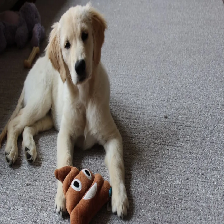

In [5]:
img = image.load_img('../../img/dog2.webp',target_size=(224,224))
img

In [6]:
X = image.img_to_array(img)
print(X.shape)
X = np.expand_dims(X,axis=0)
print(X.shape)
X = preprocess_input(X)

(224, 224, 3)
(1, 224, 224, 3)


In [7]:
Y_predict = model.predict(X)
Y_predict = decode_predictions(Y_predict, top=10)
Y_predict

1/1 [==============================] - 5s 5s/step


[[('n02091831', 'Saluki', 0.8420886),
  ('n02099601', 'golden_retriever', 0.08395558),
  ('n02088094', 'Afghan_hound', 0.04928444),
  ('n02090622', 'borzoi', 0.009544206),
  ('n02099712', 'Labrador_retriever', 0.0031354039),
  ('n03494278', 'harmonica', 0.0016375541),
  ('n02100877', 'Irish_setter', 0.0011529248),
  ('n02483362', 'gibbon', 0.0010009476),
  ('n02104029', 'kuvasz', 0.0008921701),
  ('n02106030', 'collie', 0.00072613236)]]

In [4]:
capture = cv2.VideoCapture(0)
while True:
    ret, frame = capture.read()
    frame = cv2.resize(frame,(800, 800))
    image = frame[...,::-1] #bgr to rgb
    X = np.expand_dims(image,axis=0)
    X = preprocess_input(X)
#     Y_predict = model.predict(X)
#     name = decode_predictions(Y_predict, top=1)[0][0][1]
#     cv2.putText(frame, name, (30,30), cv2.FONT_HERSHEY_SIMPLEX,1.0,(0,0,0))
    cv2.imshow('webcam', frame)
#     cv2.cvtColor(cv2.COLOR_BGR2RGB)
    if cv2.waitKey(1) == 13:
        break
capture.release()
cv2.destroyAllWindows()

QObject::moveToThread: Current thread (0x6a7ca50) is not the object's thread (0x6a77bf0).
Cannot move to target thread (0x6a7ca50)

QObject::moveToThread: Current thread (0x6a7ca50) is not the object's thread (0x6a77bf0).
Cannot move to target thread (0x6a7ca50)

QObject::moveToThread: Current thread (0x6a7ca50) is not the object's thread (0x6a77bf0).
Cannot move to target thread (0x6a7ca50)

QObject::moveToThread: Current thread (0x6a7ca50) is not the object's thread (0x6a77bf0).
Cannot move to target thread (0x6a7ca50)

QObject::moveToThread: Current thread (0x6a7ca50) is not the object's thread (0x6a77bf0).
Cannot move to target thread (0x6a7ca50)

QObject::moveToThread: Current thread (0x6a7ca50) is not the object's thread (0x6a77bf0).
Cannot move to target thread (0x6a7ca50)

QObject::moveToThread: Current thread (0x6a7ca50) is not the object's thread (0x6a77bf0).
Cannot move to target thread (0x6a7ca50)

QObject::moveToThread: Current thread (0x6a7ca50) is not the object's thread

In [28]:
import tensorflow as tf; print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


# CNN Movie Polarity Detection

### dataset url : https://www.cs.cornell.edu/people/pabo/movie-review-data/

## search  : keras text_generation

In [52]:
import os
from nltk.corpus import stopwords
from nltk import word_tokenize
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelBinarizer
# from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model,Sequential,load_model
from tensorflow.keras.layers import Input,Dense,Flatten,Embedding,Conv1D,MaxPool1D,concatenate,Dropout,Conv2D,MaxPool2D,Activation,BatchNormalization

In [5]:
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /home/masoud/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/masoud/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/masoud/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/masoud/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [6]:
from string import punctuation
def punctuation_cleaner(string):
    global punctuation
    punctuation = punctuation+'\n\\//'
    s = str.maketrans('','',punctuation)
    return string.translate(s)

stopwords_en = stopwords.words('english')

In [9]:
negative_document = []
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

for file_name in os.listdir('../../../datasets/PolarityDetection/neg/'):
    with open(f'../../../datasets/PolarityDetection/neg/{file_name}') as f:
        text = f.read()
        text = punctuation_cleaner(text)
        text = word_tokenize(text)
        text = [w for w in text if w not in stopwords_en]
        text = set([stemmer.stem(w) for w in text])
        negative_document.append([' '.join(text),0])
        
positive_document = []
for file_name in os.listdir('../../../datasets/PolarityDetection/pos/'):
    with open(f'../../../datasets/PolarityDetection/pos/{file_name}') as f:
        text = f.read()
        text = punctuation_cleaner(text)
        text = word_tokenize(text)
        text = [w for w in text if w not in stopwords_en]
        text = [stemmer.stem(w) for w in text]
        text = [lemmatizer.lemmatize(w) for w in text]
        positive_document.append([' '.join(text),1])

In [10]:
PDF = pd.DataFrame(positive_document,columns=['text','target'])
NDF = pd.DataFrame(negative_document,columns=['text','target'])
DF = pd.concat([PDF,NDF],axis=0)
DF = DF.reset_index(drop=True)

In [11]:
DF.shape

(2000, 2)

In [12]:
DF.head()

,text,target
0,1994 insid look scandalridden run democrat pre...,1
1,note may consid portion follow text spoiler fo...,1
2,italian hitchcock acknowledg master giallo mur...,1
3,know your truli differ cinemat experi moment r...,1
4,assum noth phrase perhap one use 1990 first im...,1


In [13]:
max_len = DF['text'].str.split(' ').str.len().max() 

In [14]:
X_train,X_test,Y_train,Y_test = train_test_split(DF.iloc[:,:-1],DF['target'],test_size=.3)

In [15]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train['text'])

In [16]:
vocab_len = len(tokenizer.word_index) + 1 

In [17]:
X_train = tokenizer.texts_to_sequences(X_train['text'])
X_train = pad_sequences(X_train,maxlen=max_len,padding='post')

In [18]:
X_test = tokenizer.texts_to_sequences(X_test['text'])
X_test = pad_sequences(X_test,maxlen=max_len,padding='post')

In [ ]:
# input1 = Input(shape=(max_len,))
# embeding1 = Embedding(max_len,100)(input1)
# conv1 = Conv1D(filters=32, kernel_size=4, activation='relu')(embeding1)
# dropout1 = Dropout(.5)(conv1)
# maxpool1 = MaxPool1D(pool_size=2)(dropout1)
# flat = Flatten()(maxpool1)
# dense1 = Dense(10,activation='relu')(flat)
# output = Dense(1,activation='sigmoid')(dense1)

# model = Model(inputs=[input1],outputs=output)

# model.compile(
#     loss='binary_crossentropy',
#     optimizer = 'adam',
#     metrics=['accuracy']
# )

In [53]:
model = Sequential([
    Embedding(input_dim=vocab_len,output_dim=200,input_shape=(max_len,)),
    Conv1D(filters=32, kernel_size=4, activation='relu'),
    Dropout(.2),
    MaxPool1D(pool_size=2),
    Flatten(),
    Dense(10,activation='relu'),
    Dense(1,activation='sigmoid')
])
model.compile(
    loss='binary_crossentropy',
    optimizer = Adam(),
    metrics=['accuracy']
)

In [54]:
history = model.fit(X_train,Y_train,epochs=50,batch_size=20,validation_data=(X_test,Y_test))

Epoch 1/50
70/70 [==============================] - 1s 10ms/step - loss: 0.4262 - accuracy: 0.7907 - val_loss: 0.0875 - val_accuracy: 0.9667
Epoch 2/50
70/70 [==============================] - 1s 8ms/step - loss: 0.0252 - accuracy: 0.9921 - val_loss: 0.0257 - val_accuracy: 0.9900
Epoch 3/50
70/70 [==============================] - 1s 9ms/step - loss: 0.0046 - accuracy: 0.9993 - val_loss: 0.0181 - val_accuracy: 0.9917
Epoch 4/50
70/70 [==============================] - 1s 8ms/step - loss: 0.0026 - accuracy: 0.9993 - val_loss: 0.0132 - val_accuracy: 0.9967
Epoch 5/50
70/70 [==============================] - 1s 8ms/step - loss: 0.0014 - accuracy: 0.9993 - val_loss: 0.0185 - val_accuracy: 0.9900
Epoch 6/50
70/70 [==============================] - 1s 9ms/step - loss: 8.0382e-04 - accuracy: 1.0000 - val_loss: 0.0154 - val_accuracy: 0.9950
Epoch 7/50
70/70 [==============================] - 1s 8ms/step - loss: 3.8463e-04 - accuracy: 1.0000 - val_loss: 0.0132 - val_accuracy: 0.9967
Epoch 8/50


In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 1389, 200)         5442400   
                                                                 
 conv1d_1 (Conv1D)           (None, 1386, 32)          25632     
                                                                 
 dropout_1 (Dropout)         (None, 1386, 32)          0         
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 693, 32)          0         
 1D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 22176)             0         
                                                                 
 dense_2 (Dense)             (None, 10)                221770    
                                                      

In [ ]:
# model.save('../../../datasets/models/movie_polarity_detection.h5')

In [ ]:
# load_model('../../../datasets/models/movie_polarity_detection.h5')

## Multi Channel

In [55]:
input1 = Input(shape=(max_len,))
embeding1 = Embedding(vocab_len,500)(input1)
conv1 = Conv1D(filters=32, kernel_size=4, activation='relu')(embeding1)
# dropout1 = Dropout(.5)(conv1)
maxpool1 = MaxPool1D(pool_size=2)(conv1)
flat1 = Flatten()(maxpool1)

input2 = Input(shape=(max_len,))
embeding2 = Embedding(vocab_len,500)(input2)
conv2 = Conv1D(filters=32, kernel_size=6, activation='relu')(embeding2)
# dropout2 = Dropout(.5)(conv2)
maxpool2 = MaxPool1D(pool_size=2)(conv2)
flat2 = Flatten()(maxpool2)

input3 = Input(shape=(max_len,))
embeding3 = Embedding(vocab_len,500)(input3)
conv3 = Conv1D(filters=32, kernel_size=8, activation='relu')(embeding3)
# dropout3 = Dropout(.5)(conv3)
maxpool3 = MaxPool1D(pool_size=2)(conv3)
flat3 = Flatten()(maxpool3)

flatX = concatenate([flat1,flat2,flat3])
dense1 = Dense(100,activation='relu')(flatX)
dense2 = Dense(10,activation='relu')(dense1)
output = Dense(1,activation='sigmoid')(dense2)

In [59]:
model = Model(inputs=[input1,input2,input3],outputs=output)
model.compile(
    loss='binary_crossentropy',
    optimizer = Adam(),
    metrics=['accuracy']
)

In [31]:
plot_model(model,show_layer_names=False,show_layer_activations=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [61]:
history = model.fit(
    [X_train,X_train,X_train],
    Y_train,
    epochs=20,
    batch_size=20,
    validation_data=([X_test,X_test,X_test],Y_test)
)

Epoch 1/20
70/70 [==============================] - 3s 37ms/step - loss: 0.0080 - accuracy: 0.9979 - val_loss: 0.1768 - val_accuracy: 0.9467
Epoch 2/20
70/70 [==============================] - 3s 37ms/step - loss: 0.0223 - accuracy: 0.9957 - val_loss: 0.0305 - val_accuracy: 0.9917
Epoch 3/20
70/70 [==============================] - 3s 37ms/step - loss: 0.0025 - accuracy: 0.9993 - val_loss: 0.0286 - val_accuracy: 0.9917
Epoch 4/20
70/70 [==============================] - 3s 37ms/step - loss: 5.6820e-04 - accuracy: 1.0000 - val_loss: 0.0335 - val_accuracy: 0.9917
Epoch 5/20
70/70 [==============================] - 3s 37ms/step - loss: 5.0290e-05 - accuracy: 1.0000 - val_loss: 0.0327 - val_accuracy: 0.9917
Epoch 6/20
70/70 [==============================] - 3s 37ms/step - loss: 2.6294e-05 - accuracy: 1.0000 - val_loss: 0.0314 - val_accuracy: 0.9917
Epoch 7/20
70/70 [==============================] - 3s 37ms/step - loss: 1.9074e-05 - accuracy: 1.0000 - val_loss: 0.0305 - val_accuracy: 0.99

In [ ]:
model.save('../../../datasets/models/movie_polarity_detection.h5')

In [ ]:
PLT.plot(history.history['accuracy'], color='green', label='train data')
PLT.plot(history.history['val_accuracy'], color='red', label='test data')

In [ ]:
PLT.plot(history.history['loss'], color='green', label='train data')
PLT.plot(history.history['val_loss'], color='red', label='test data')

# House Price Regression

In [3]:
import glob

In [4]:
DF = pd.read_csv('../../../datasets/Houses Dataset/HousesInfo.txt',header=None,sep=' ',
                names=['bedrooms','bathrooms','area','zipcode','price'])
DF.index = np.arange(1, len(DF)+1)

In [5]:
DF.head(1)

,bedrooms,bathrooms,area,zipcode,price
1,4,4.0,4053,85255,869500


In [6]:
images = []
for i in DF.index.values:
    basepath = os.path.sep.join([
        '../../../datasets/Houses Dataset',
        "{}_*".format(i)
    ])
    imgPaths = sorted(glob.glob(basepath))
    inputImages = []
    for imgPath in imgPaths:
        img = cv2.cvtColor(cv2.resize(cv2.imread(imgPath),(128,128)),cv2.COLOR_BGR2RGB)
        inputImages.append(img)
    outputImages = np.zeros((256,256,3),dtype=np.int32)
    outputImages[0:128,0:128] = inputImages[0]
    outputImages[0:128,128:256] = inputImages[1]
    outputImages[128:256,128:256] = inputImages[2]
    outputImages[128:256,0:128] = inputImages[3]
    images.append(outputImages)
images = np.array(images)

In [7]:
FlattenIMG = pd.DataFrame(images.reshape(535,-1))
FlattenIMG.index = np.arange(1, len(FlattenIMG)+1)
NEWDF = pd.concat([DF,FlattenIMG],axis=1)

MaxPrice = NEWDF['price'].max()
X = NEWDF[NEWDF.columns.difference(['price'])]
Y = NEWDF['price'] / MaxPrice

In [8]:
X.head(1)

,0,1,2,3,4,5,6,7,8,9,...,196602,196603,196604,196605,196606,196607,area,bathrooms,bedrooms,zipcode
1,181,156,126,185,168,128,159,124,98,154,...,121,134,134,97,114,175,4053,4.0,4,85255


In [9]:
TABLECOLs = ['area','bathrooms','bedrooms','zipcode']
IMGCOLS = X.columns.difference(TABLECOLs)

In [10]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=3020,test_size=.2)

In [11]:
input1 = Input(shape=(256,256,3))
conv1 = Conv2D(16,(3,3),padding='same',activation='relu')(input1)
batch_norm_1 = BatchNormalization(axis=-1)(conv1)
maxpool1 = MaxPool2D(pool_size=(2,2))(batch_norm_1)
conv2 = Conv2D(32,(3,3),padding='same',activation='relu')(input1)
batch_norm_2 = BatchNormalization(axis=-1)(conv2)
maxpool2 = MaxPool2D(pool_size=(2,2))(batch_norm_2)
conv3 = Conv2D(64,(3,3),padding='same',activation='relu')(input1)
batch_norm_3 = BatchNormalization(axis=-1)(conv3)
maxpool3 = MaxPool2D(pool_size=(2,2))(batch_norm_3)
flatten1 = Flatten()(maxpool3)
dense1 = Dense(100,activation='relu')(flatten1)
batch_norm_4 = BatchNormalization(axis=-1)(dense1)
dense2 = Dense(10,activation='relu')(batch_norm_4)
model1 = Model(input1,dense2)

2022-12-06 22:32:09.052382: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/masoud/anaconda3/lib/python3.9/site-packages/cv2/../../lib64:
2022-12-06 22:32:09.052413: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-06 22:32:09.052446: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: masoud-Aspire-V3-571G
2022-12-06 22:32:09.052455: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: masoud-Aspire-V3-571G
2022-12-06 22:32:09.052544: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: NOT_FOUND: was unable to find libcuda.so DSO loaded into this program
2022-12-06 22:32:09.052588: I tensorflow/

In [12]:
model2 = Sequential()
model2.add(Dense(50,activation='relu',input_dim=4))
model2.add(Dense(25,activation='relu'))
model2.add(Dense(10,activation='relu'))
model2.add(Dense(10,activation='relu'))

In [13]:
combine_input = concatenate([model1.output,model2.output])
dense_final_1 = Dense(10,activation='relu')(combine_input)
dense_final_2 = Dense(1,activation='linear')(dense_final_1) # sigmoid
modelX = Model(inputs=[model1.input,model2.input], outputs=dense_final_2)
modelX.compile(
    loss='mean_absolute_error',
    optimizer = 'adam'
)

In [14]:
histrory = modelX.fit(
    [
        X_train[IMGCOLS].to_numpy().reshape(len(X_train),256,256,3),
        X_train[TABLECOLs]
    ],Y_train,
    validation_data=(
        [
            X_test[IMGCOLS].to_numpy().reshape(len(X_test),256,256,3),
            X_test[TABLECOLs]
        ],Y_test
    ),
    epochs=20,
    batch_size=50
)

Epoch 1/20


2022-12-06 22:33:06.096665: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 838860800 exceeds 10% of free system memory.
2022-12-06 22:33:06.672227: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 838860800 exceeds 10% of free system memory.
2022-12-06 22:33:10.453768: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 838860800 exceeds 10% of free system memory.


1/9 [==>...........................] - ETA: 1:15 - loss: 9132.2617

2022-12-06 22:33:12.902119: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 838860800 exceeds 10% of free system memory.
2022-12-06 22:33:13.460174: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 838860800 exceeds 10% of free system memory.


9/9 [==============================] - 65s 7s/step - loss: 5848.5229 - val_loss: 1818.3927
Epoch 2/20
9/9 [==============================] - 61s 7s/step - loss: 979.1451 - val_loss: 442.6406
Epoch 3/20
9/9 [==============================] - 67s 8s/step - loss: 265.4567 - val_loss: 57.9060
Epoch 4/20
9/9 [==============================] - 69s 8s/step - loss: 2.0152 - val_loss: 33.7585
Epoch 5/20
9/9 [==============================] - 69s 8s/step - loss: 1.5489 - val_loss: 13.3219
Epoch 6/20
9/9 [==============================] - 68s 8s/step - loss: 0.9567 - val_loss: 1.0869
Epoch 7/20
9/9 [==============================] - 69s 8s/step - loss: 0.6010 - val_loss: 0.8628
Epoch 8/20
9/9 [==============================] - 70s 8s/step - loss: 0.4159 - val_loss: 1.5155
Epoch 9/20
9/9 [==============================] - 72s 8s/step - loss: 0.3118 - val_loss: 0.4870
Epoch 10/20
9/9 [==============================] - 71s 8s/step - loss: 0.2137 - val_loss: 0.6872
Epoch 11/20
9/9 [==================

In [ ]:
plot_model(modelX,show_layer_names=False,show_shapes=True)

In [16]:
Y_predicted = modelX.predict([
    X_test[IMGCOLS].to_numpy().reshape(len(X_test),256,256,3),
    X_test[TABLECOLs]
]) * MaxPrice
Y_predicted = Y_predicted.flatten()

4/4 [==============================] - 3s 742ms/step


In [18]:
diff = abs(Y_predicted - ( Y_test.values * MaxPrice ))
diff.mean()

1114574.503006676

In [28]:
NEWDF['price'].mean()

589362.8112149533

In [19]:
NEWDF['price'].describe()

count    5.350000e+02
mean     5.893628e+05
std      5.090261e+05
min      2.200000e+04
25%      2.492000e+05
50%      5.290000e+05
75%      7.285000e+05
max      5.858000e+06
Name: price, dtype: float64

In [21]:
from sklearn.metrics import r2_score,mean_absolute_error

In [23]:
r2_score(y_pred=Y_predicted,y_true=( Y_test.values * MaxPrice ) )

-13.75167280848191

In [27]:
mean_absolute_error(y_pred=Y_predicted,y_true=( Y_test.values * MaxPrice ) )

1114574.503006676

# Simple one hot encode

In [ ]:
zipbin = LabelBinarizer() #simple one hot encode
zipbin.fit(NEWDF['zipcode'])
zipbin.transform(X_train['zipcode'])